# RandomForestRegressor
## Con los datos de la hora anterior (Del contaminante en cuestion)

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def pintarGrafico(y_pred, y_test, nombre, mae):
    cuantos = 100
    ypred = y_pred[:cuantos]
    ylabel = list(y_test)[:cuantos]
    x = list(range(len(ylabel)))
    plt.rcParams["font.size"] = 10
    figure, ax = plt.subplots(1,figsize=(4, 4),dpi=100)    
    for i in range(len(x)):
        plt.plot([x[i],x[i]],[ypred[i],ylabel[i]],color="darkorange")

    plt.title("Prediccion para " + nombre + " mae: " + str(round(mae, 3)))
    plt.scatter(x,ypred, color='blue', label="pred",s=8)
    plt.scatter(x,ylabel, color='green', label="label",s=4)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [2]:
url ="https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"
df = pd.read_csv(url,parse_dates=['FECHAH'])
df = df.dropna()
df["hora"] = df['FECHAH'].dt.hour

valores = df.TIPO.unique()
for v in valores:
    print(v)
    df[v] = df.TIPO.apply(lambda x: 1 if x==v else 0)

df.head()

LABORABLE
SABADO
DOMINGO
FESTIVO


,FECHAH,TIPO,CO,NO,NO2,PM2.5,PM10,NOx,O3,VELOCIDAD VIENTO,...,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA,hora,LABORABLE,SABADO,DOMINGO,FESTIVO
5035,2019-08-01 00:00:00,LABORABLE,0.2,4.0,22.0,10.0,19.0,29.0,58.87,1.84,...,943.0,0.0,223.0,347.0,570.0,0,1,0,0,0
5036,2019-08-01 01:00:00,LABORABLE,0.2,2.0,15.0,10.0,21.0,18.0,63.73,1.97,...,943.0,0.0,173.0,231.0,404.0,1,1,0,0,0
5037,2019-08-01 02:00:00,LABORABLE,0.1,4.0,14.0,9.0,18.0,19.0,66.50,1.72,...,943.0,0.0,107.0,180.0,287.0,2,1,0,0,0
5038,2019-08-01 03:00:00,LABORABLE,0.1,1.0,14.0,10.0,18.0,15.0,66.62,1.55,...,943.0,0.0,80.0,129.0,209.0,3,1,0,0,0
5039,2019-08-01 04:00:00,LABORABLE,0.2,2.0,15.0,10.0,19.0,18.0,62.57,1.13,...,943.0,0.0,89.0,105.0,194.0,4,1,0,0,0


C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


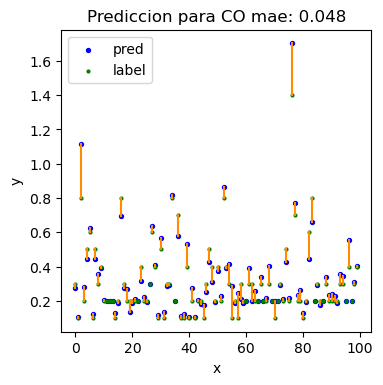

C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


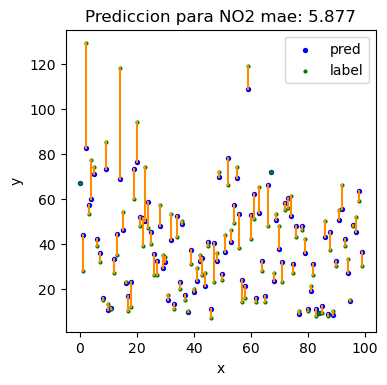

C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


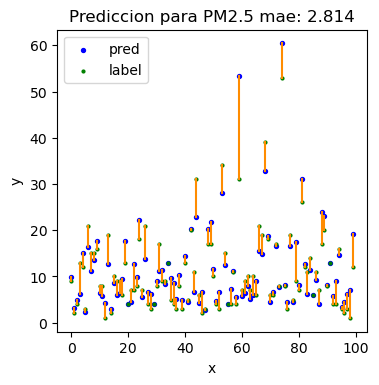

C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


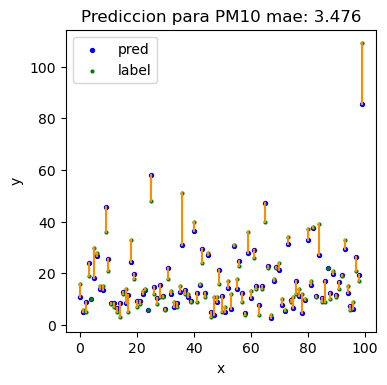

C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


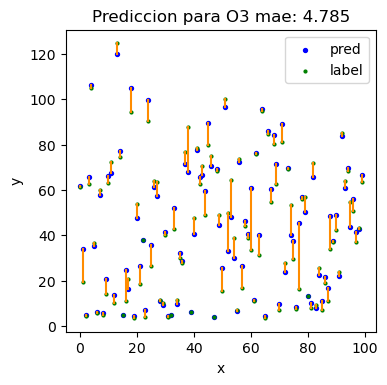

In [5]:
#df = los datos del dataframe
#coly = El contaminante a analizar.
#hAnterior = Añadir la hora anterior o no.

def get_MAE(df,coly, hAnterior):
    colsX = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO"]
    if hAnterior:
        colsX.append("pred")
        #Añadimos la columna con la prediccion de la hora anterior
        df["pred"] = df[coly].shift(+1)
        df = df[1:]

    X = df[colsX]
    y = df[coly]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    metodo = RandomForestRegressor()
    modelo = metodo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    X_test["real"] = y_test
    X_test["pred"] = y_pred
    mae = mean_absolute_error(y_pred,y_test)
    pintarGrafico(y_pred, y_test, coly, mae)
    return X_test

colContaminantes = ["CO","NO2", "PM2.5", "PM10" ,"O3"]
for i in range(len(colContaminantes)) :
    #Se ha añadido la prediccion de la hora anterior
    df2 = df
    df_test = get_MAE(df2,colContaminantes[i], True)
    

C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["real"] = y_test
C:\Users\Alberto\AppData\Local\Temp/ipykernel_6512/2803777676.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["pred"] = y_pred


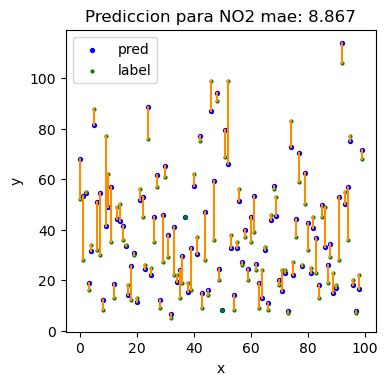

,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,hora,LABORABLE,SABADO,DOMINGO,FESTIVO,real,pred
7544,0.76,262.0,15.2,48.0,941.0,0.0,676.0,779.0,17,1,0,0,0,52.0,68.18
10344,1.16,140.0,15.6,41.0,955.0,0.0,586.0,733.0,12,1,0,0,0,28.0,53.20
9723,1.12,146.0,11.7,83.0,952.0,0.0,618.0,659.0,15,1,0,0,0,55.0,54.62
7775,1.73,233.0,7.5,63.0,929.0,0.0,628.0,773.0,8,0,1,0,0,16.0,19.01
18973,0.61,67.0,7.8,86.0,953.0,0.0,41.0,34.0,3,1,0,0,0,34.0,31.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474,3.29,237.0,12.6,79.0,946.0,0.0,563.0,606.0,11,0,0,1,0,11.0,11.17
17822,0.59,41.0,-3.6,87.0,956.0,0.0,64.0,41.0,4,1,0,0,0,87.0,55.91
20331,2.71,224.0,17.8,47.0,937.0,0.0,653.0,765.0,17,1,0,0,0,28.0,24.47
15483,1.14,220.0,26.3,34.0,950.0,0.0,627.0,735.0,17,1,0,0,0,47.0,50.57


In [6]:
df_test = get_MAE(df, "NO2", False)
df_test

In [184]:
df.describe()

,CO,NO,NO2,PM2.5,PM10,NOx,O3,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,...,PRECIPITACIONES,ES10,ES53,ESSUMA,hora,LABORABLE,SABADO,DOMINGO,FESTIVO,pred
count,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,...,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14705.000000,14704.000000
mean,0.313499,27.113635,41.350493,10.343489,15.598640,82.868956,45.255551,1.184330,144.201904,15.790139,...,0.046420,379.984563,460.153553,840.138116,11.503094,0.678069,0.133288,0.142945,0.045699,45.252305
std,0.213737,43.936022,28.759847,8.125236,12.187177,90.815689,28.698231,0.598395,84.425840,8.191275,...,0.423996,233.759281,263.406682,487.085355,6.925504,0.467233,0.339897,0.350028,0.208838,28.696507
min,0.100000,1.000000,2.000000,0.000000,1.000000,3.000000,1.780000,0.500000,0.000000,-7.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.780000
25%,0.200000,6.000000,20.000000,5.000000,8.000000,30.000000,19.260000,0.690000,68.000000,9.900000,...,0.000000,142.000000,193.000000,339.000000,6.000000,0.000000,0.000000,0.000000,0.000000,19.257500
50%,0.200000,11.000000,35.000000,8.000000,13.000000,53.000000,45.740000,1.060000,132.000000,14.300000,...,0.000000,426.000000,530.000000,945.000000,12.000000,1.000000,0.000000,0.000000,0.000000,45.740000
75%,0.400000,28.000000,55.000000,13.000000,20.000000,101.000000,66.770000,1.510000,221.000000,21.300000,...,0.000000,596.000000,700.000000,1298.000000,18.000000,1.000000,0.000000,0.000000,0.000000,66.770000
max,2.600000,580.000000,215.000000,81.000000,143.000000,1088.000000,423.400000,5.040000,358.000000,40.000000,...,17.500000,1102.000000,1039.000000,1979.000000,23.000000,1.000000,1.000000,1.000000,1.000000,423.400000
